## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from datetime import datetime
%matplotlib inline

## Load Dataset

In [2]:
df = pd.read_csv('saham_n_crypto5y.csv')
df = df[df['Symbol'] == 'BBRI']
df.head()

Symbol        Date    Open    High     Low   Close    Adj Close  \
1261   BBRI  2016-01-04  2280.0  2320.0  2240.0  2295.0  1902.050903   
1262   BBRI  2016-01-05  2315.0  2365.0  2315.0  2315.0  1918.626465   
1263   BBRI  2016-01-06  2280.0  2355.0  2280.0  2305.0  1910.338745   
1264   BBRI  2016-01-07  2270.0  2305.0  2250.0  2250.0  1864.755859   
1265   BBRI  2016-01-08  2250.0  2340.0  2250.0  2320.0  1922.770264   

           Volume  
1261  100379000.0  
1262  108043000.0  
1263  105125500.0  
1264   71275500.0  
1265  106501000.0

## Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1261 entries, 1261 to 2521
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Symbol     1261 non-null   object 
 1   Date       1261 non-null   object 
 2   Open       1260 non-null   float64
 3   High       1260 non-null   float64
 4   Low        1260 non-null   float64
 5   Close      1260 non-null   float64
 6   Adj Close  1260 non-null   float64
 7   Volume     1260 non-null   float64
dtypes: float64(6), object(2)
memory usage: 88.7+ KB


In [4]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  1260.000000  1260.000000  1260.000000  1260.000000  1260.000000   
mean   3231.107143  3266.166667  3193.297619  3229.519841  2937.918590   
std     731.248935   734.173948   723.311363   729.299328   751.573183   
min    1915.000000  1940.000000  1905.000000  1905.000000  1623.103027   
25%    2573.750000  2600.000000  2540.000000  2575.000000  2271.989990   
50%    3140.000000  3170.000000  3090.000000  3130.000000  2906.033691   
75%    3822.500000  3870.000000  3780.000000  3832.500000  3493.975586   
max    4730.000000  4760.000000  4690.000000  4740.000000  4454.604980   

             Volume  
count  1.260000e+03  
mean   1.246883e+08  
std    8.626896e+07  
min    0.000000e+00  
25%    7.595665e+07  
50%    1.073047e+08  
75%    1.501144e+08  
max    8.726073e+08

In [5]:
df.shape

(1261, 8)

## Data Cleaning and Preprocessing

### Check Duplicate Data

In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(1261, 8)

### Check Data Types

In [8]:
df.dtypes

Symbol        object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.dtypes

Symbol               object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

### Check Missing Value

In [11]:
df.isnull().sum()

Symbol       0
Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Symbol       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Exploratory Data Analysis

### BBRI 2016-2020 Candlestick Chart

In [14]:
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]

df_bbri5y = df.query("""`Symbol` == 'BBRI'""")

chart_data = pd.concat([
	df_bbri5y['Date'],
	df_bbri5y['Open'],
	df_bbri5y['Close'],
	df_bbri5y['High'],
	df_bbri5y['Low'],
], axis=1)
chart_data = chart_data.sort_values(['Date'])

chart = [go.Candlestick(
	x=chart_data['Date'], open=chart_data['Open'], close=chart_data['Close'],
	high=chart_data['High'], low=chart_data['Low'],
)]
figure = go.Figure(data=chart, layout=go.Layout({
    'legend': {'orientation': 'h', 'x': 0.99, 'xanchor': 'right', 'y': 1.1, 'yanchor': 'top'},
    'xaxis': {'tickmode': 'array',
              'ticktext': ['2016-01-04', '2016-03-08', '2016-05-16', '2016-07-25',
                           '2016-09-28', '2016-11-30', '2017-02-03', '2017-04-10',
                           '2017-06-19', '2017-08-21', '2017-10-23', '2017-12-25',
                           '2018-02-26', '2018-04-30', '2018-07-02', '2018-09-03',
                           '2018-11-05', '2019-01-07', '2019-03-11', '2019-05-13',
                           '2019-07-16', '2019-09-17', '2019-11-19', '2020-01-27',
                           '2020-03-31', '2020-06-11', '2020-08-14', '2020-10-21',
                           '2020-12-30'],
              'tickvals': [0, 45, 90, 135, 180, 225, 270, 315, 360, 405, 450, 495,
                           540, 585, 630, 675, 720, 765, 810, 855, 900, 945, 990,
                           1035, 1080, 1125, 1170, 1215, 1259],
              'type': 'category'}
}))
figure.show()

### Variable Correlation

<AxesSubplot:>

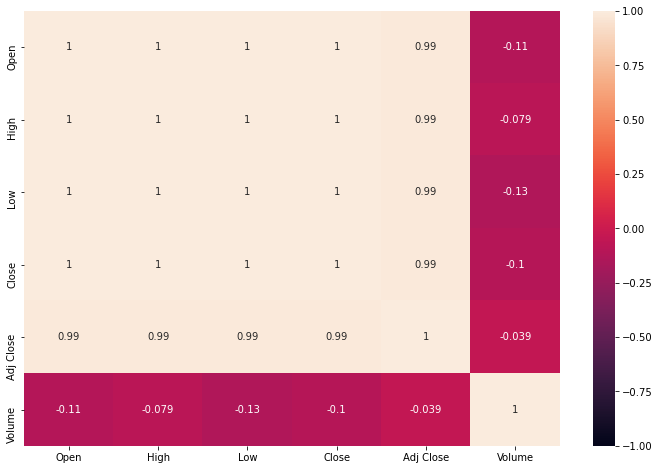

In [15]:
cor=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True,vmin=-1,vmax=1)

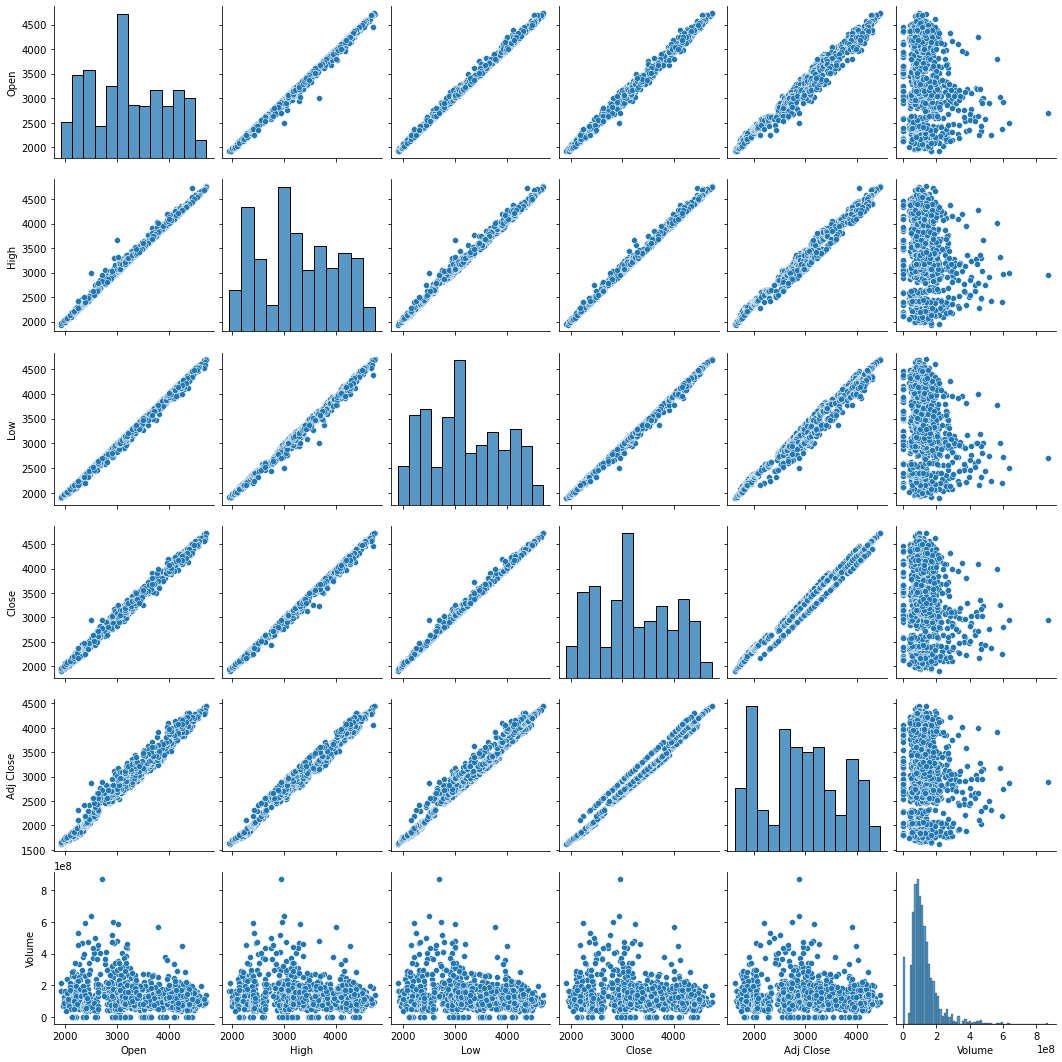

In [16]:
sns.pairplot(data=df)

## Modelling

### Multiple Linear Regression

#### Data Partition

In [17]:
x = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = df.loc[:,'Close']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 123)

#### Build Model

In [19]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

#### Model Predictions

In [21]:
pred = lin_reg.predict(x_test)

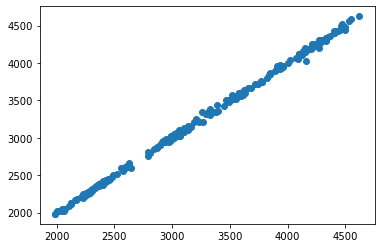

In [22]:
plt.scatter(y_test, pred)

#### Model Evaluation

In [23]:
print(lin_reg.intercept_)

20.34903924219907


In [24]:
coeff_df = pd.DataFrame(lin_reg.coef_, x.columns, columns=['Coefficient'])
coeff_df

Coefficient
Open      -5.205604e-01
High       5.791206e-01
Low        8.753178e-01
Adj Close  6.953338e-02
Volume     3.308621e-09

In [25]:
test_pred = lin_reg.predict(x_test)
train_pred = lin_reg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 17.145471238239253
MSE: 559.9203557817474
RMSE: 23.662636281313784
R2 Square 0.999002457689778
__________________________________
Train set evaluation:
_____________________________________
MAE: 17.811088984509787
MSE: 659.2669191532669
RMSE: 25.676193626650875
R2 Square 0.9987413393811568
__________________________________


In [26]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df

Model        MAE         MSE       RMSE  R2 Square
0  Linear Regression  17.145471  559.920356  23.662636   0.999002

#### Real Data Predictions (2021 Q1-Q2)

In [27]:
bbri_pred = pd.read_csv("bbri_pred.csv")
bbri_pred['Date'] = pd.to_datetime(bbri_pred['Date'])

In [28]:
x_pred = bbri_pred[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y_pred = bbri_pred.loc[:,'Close']

In [29]:
pred = lin_reg.predict(x_pred)

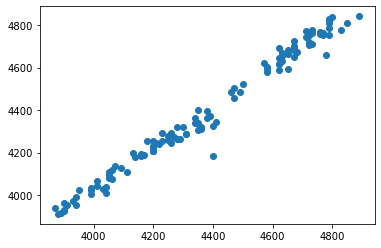

In [30]:
plt.scatter(y_pred, pred)

In [31]:
pred_set = lin_reg.predict(x_pred)

print('Pred set evaluation:\n_____________________________________')
print_evaluate(y_pred, pred_set)

Pred set evaluation:
_____________________________________
MAE: 31.93474918008673
MSE: 1751.796242183069
RMSE: 41.85446502086807
R2 Square 0.9794374330682958
__________________________________


### Lasso Regression

#### Build Model

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
model = Lasso()
param_grid = {
    'alpha' : [0.1, 0.5, 10],
    'fit_intercept' : [True, False],
    'normalize' : [True, False],
    'precompute' : [True, False],
    'max_iter' : [1000, 2000, 5000],
    'tol' : [0.0001, 0.0005],
    'warm_start' : [True, False],
    'positive' : [True, False]
}

In [33]:
CV_lasso = GridSearchCV(estimator=model, param_grid=param_grid, cv= 2, n_jobs = None or 1)
CV_lasso.fit(x_train, y_train)

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 172972.20712628658, tolerance: 27432.536349206355

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 180656.89123473066, tolerance: 25274.010828373015

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 172972.20712628658, tolerance: 27432.536349206355

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 180656.8912

GridSearchCV(cv=2, estimator=Lasso(), n_jobs=1,
             param_grid={'alpha': [0.1, 0.5, 10],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 2000, 5000],
                         'normalize': [True, False], 'positive': [True, False],
                         'precompute': [True, False], 'tol': [0.0001, 0.0005],
                         'warm_start': [True, False]})

In [34]:
CV_lasso.best_params_

{'alpha': 0.5,
 'fit_intercept': True,
 'max_iter': 5000,
 'normalize': False,
 'positive': False,
 'precompute': True,
 'tol': 0.0005,
 'warm_start': True}

In [35]:
CV_lasso.best_score_

0.9987103894526287

In [36]:
# With GridSearch

test_pred = CV_lasso.predict(x_test)
train_pred = CV_lasso.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 17.153914855871907
MSE: 559.8905836855798
RMSE: 23.662007177870176
R2 Square 0.9990025107311173
__________________________________
Train set evaluation:
_____________________________________
MAE: 17.814535402170975
MSE: 659.2818824708319
RMSE: 25.676485010040448
R2 Square 0.9987413108134584
__________________________________


In [37]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model        MAE         MSE       RMSE  R2 Square
0  Linear Regression  17.145471  559.920356  23.662636   0.999002
1   Lasso Regression  17.153915  559.890584  23.662007   0.999003

#### Real Data Predictions (2021 Q1-Q2)

In [38]:
pred = CV_lasso.predict(x_pred)

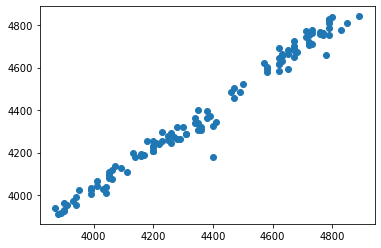

In [39]:
plt.scatter(y_pred, pred)

In [40]:
pred_set = CV_lasso.predict(x_pred)

print('Pred set evaluation:\n_____________________________________')
print_evaluate(y_pred, pred_set)

Pred set evaluation:
_____________________________________
MAE: 31.937782958388343
MSE: 1755.708001117729
RMSE: 41.901169448092126
R2 Square 0.9793915168806835
__________________________________


### Elastic Net Regression

#### Build Model

In [41]:
# With GridSearch

from sklearn.linear_model import ElasticNet
model = ElasticNet()
param_grid = {
    'alpha' : [0.1, 0.5, 10],
    'l1_ratio' : [0.1, 0.5, 0.9, 1],
    'fit_intercept' : [True, False],
    'normalize' : [True, False],
    'precompute' : [True, False],
    'max_iter' : [1000, 2000, 5000],
    'tol' : [0.0001, 0.0005],
    'warm_start' : [True, False],
    'positive' : [True, False]
}

In [42]:
CV_enet = GridSearchCV(estimator=model, param_grid=param_grid, cv= 2)
CV_enet.fit(x_train, y_train)

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 172988.848586154, tolerance: 27432.536349206355

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 180743.02088770253, tolerance: 25274.010828373015

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 172988.848586154, tolerance: 27432.536349206355

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 180743.02088770

GridSearchCV(cv=2, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.5, 10],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.1, 0.5, 0.9, 1],
                         'max_iter': [1000, 2000, 5000],
                         'normalize': [True, False], 'positive': [True, False],
                         'precompute': [True, False], 'tol': [0.0001, 0.0005],
                         'warm_start': [True, False]})

In [43]:
CV_enet.best_params_

{'alpha': 10,
 'fit_intercept': True,
 'l1_ratio': 0.1,
 'max_iter': 5000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'tol': 0.0005,
 'warm_start': True}

In [44]:
CV_enet.best_score_

0.998711426946239

In [45]:
test_pred = CV_enet.predict(x_test)
train_pred = CV_enet.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 17.155458957729127
MSE: 560.464145882284
RMSE: 23.674123972858723
R2 Square 0.9990014888847907
__________________________________
Train set evaluation:
_____________________________________
MAE: 17.82334496197706
MSE: 659.3044477413737
RMSE: 25.6769244213822
R2 Square 0.9987412677322473
__________________________________


In [46]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model        MAE         MSE       RMSE  R2 Square
0       Linear Regression  17.145471  559.920356  23.662636   0.999002
1        Lasso Regression  17.153915  559.890584  23.662007   0.999003
2  Elastic Net Regression  17.155459  560.464146  23.674124   0.999001

#### Real Data Predictions (2021 Q1-Q2)

In [47]:
pred = CV_enet.predict(x_pred)

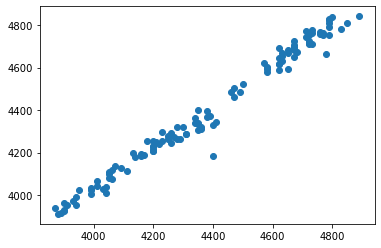

In [48]:
plt.scatter(y_pred, pred)

In [49]:
pred_set = CV_enet.predict(x_pred)

print('Pred set evaluation:\n_____________________________________')
print_evaluate(y_pred, pred_set)

Pred set evaluation:
_____________________________________
MAE: 32.069553773796386
MSE: 1758.8469577637545
RMSE: 41.93860939234579
R2 Square 0.9793546718386773
__________________________________


### Random Forest Regressor

#### Build Model

In [50]:
# With GridSearch

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
param_grid = { 
    'n_estimators': [200, 500, 1000],
    'criterion' : ['mae','mse'],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'bootstrap' : [True, False],
    'oob_score' : [True, False],
    'warm_start' : [True, False]
}

In [51]:
CV_rf = GridSearchCV(estimator=model, param_grid=param_grid, cv= 2)
CV_rf.fit(x_train, y_train)

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True


C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mae', 'mse'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500, 1000],
                         'oob_score': [True, False],
                         'warm_start': [True, False]})

In [52]:
CV_rf.best_params_

{'bootstrap': True,
 'criterion': 'mae',
 'max_features': 'sqrt',
 'n_estimators': 200,
 'oob_score': True,
 'warm_start': False}

In [53]:
CV_rf.best_score_

0.9979716614191779

In [54]:
test_pred = CV_rf.predict(x_test)
train_pred = CV_rf.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 19.098561507936495
MSE: 1016.3046881200397
RMSE: 31.879534000986272
R2 Square 0.998189372977767
__________________________________
Train set evaluation:
_____________________________________
MAE: 7.551698908730151
MSE: 145.79407536582326
RMSE: 12.074521744807257
R2 Square 0.9997216525571171
__________________________________


In [55]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model        MAE          MSE       RMSE  R2 Square
0        Linear Regression  17.145471   559.920356  23.662636   0.999002
1         Lasso Regression  17.153915   559.890584  23.662007   0.999003
2   Elastic Net Regression  17.155459   560.464146  23.674124   0.999001
3  Random Forest Regressor  19.098562  1016.304688  31.879534   0.998189

#### Real Data Predictions (2021 Q1-Q2)

In [56]:
pred = CV_rf.predict(x_pred)

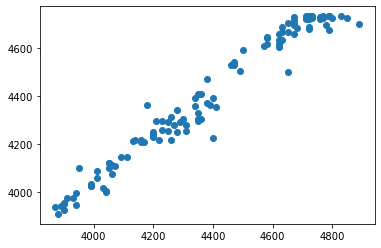

In [57]:
plt.scatter(y_pred, pred)

In [58]:
pred_set = CV_rf.predict(x_pred)

print('Pred set evaluation:\n_____________________________________')
print_evaluate(y_pred, pred_set)

Pred set evaluation:
_____________________________________
MAE: 47.134663865546216
MSE: 3526.8756775210086
RMSE: 59.38750438872649
R2 Square 0.9586015682460595
__________________________________


### Support Vector Machine

#### Feature Scalling

In [59]:
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline

pipeline = Pipeline([ ('std_scalar', StandardScaler()) ])

x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)

#### Build Model

In [60]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(x_train, y_train)

test_pred = svm_reg.predict(x_test)
train_pred = svm_reg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 18.021297125037027
MSE: 2500.966248983645
RMSE: 50.00966155637973
R2 Square 0.9955443312177582
__________________________________
Train set evaluation:
_____________________________________
MAE: 11.829227184055842
MSE: 336.8242782487182
RMSE: 18.352773039753917
R2 Square 0.9993569411080926
__________________________________


In [61]:
results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model        MAE          MSE       RMSE  R2 Square
0        Linear Regression  17.145471   559.920356  23.662636   0.999002
1         Lasso Regression  17.153915   559.890584  23.662007   0.999003
2   Elastic Net Regression  17.155459   560.464146  23.674124   0.999001
3  Random Forest Regressor  19.098562  1016.304688  31.879534   0.998189
4            SVM Regressor  18.021297  2500.966249  50.009662   0.995544

#### Real Data Predictions (2021 Q1-Q2)

In [63]:
pred = svm_reg.predict(x_pred)

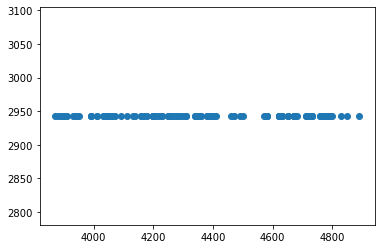

In [64]:
plt.scatter(y_pred, pred)

In [66]:
pred_set = svm_reg.predict(x_pred)

print('Pred set evaluation:\n_____________________________________')
print_evaluate(y_pred, pred_set)

Pred set evaluation:
_____________________________________
MAE: 1440.706594182877
MSE: 2160828.951435803
RMSE: 1469.9758336230575
R2 Square -24.363788819692836
__________________________________


## Models Comparison

<AxesSubplot:ylabel='Model'>

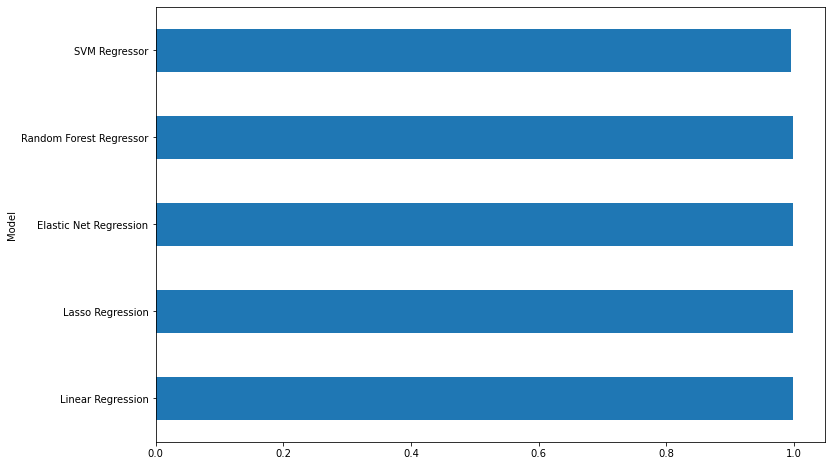

In [67]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

<AxesSubplot:ylabel='Model'>

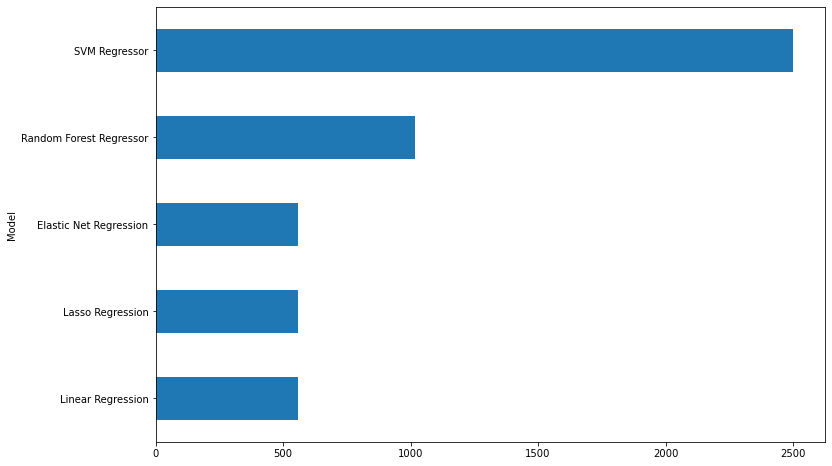

In [69]:
results_df['MSE'].plot(kind='barh', figsize=(12, 8))